<a href="https://colab.research.google.com/github/lydialydia-lydia/rwa-stablecoin-risk-spark/blob/main/01_data_fetch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a reproducible data pipeline to pull an 'asset-side' time series from DegiLlama, then visualize it.
1. Get all protocols
2. Filter candidates(look for spark/sky/maker)
3. Pull TVL hisotry for the chosen slug
4. Plot & optionally save a figure

In [20]:
import requests, pandas as pd

# DefiLlama API docs: free & open  [oai_citation:3‡DefiLlama API Docs](https://api-docs.defillama.com/?utm_source=chatgpt.com)
protocols = requests.get("https://api.llama.fi/protocols").json()
# Find all protocol slug（e.g. sky-rwa / makerdao / ondo, etc）
slugs = [p["slug"] for p in protocols]

# Choose a protocol slug to analyze
slug = "makerdao"
data = requests.get(f"https://api.llama.fi/protocol/{slug}").json()
hist = pd.DataFrame(data["tvl"])
hist["date"] = pd.to_datetime(hist["date"], unit="s")
hist = hist.rename(columns={"totalLiquidityUSD":"assets_proxy_usd"})
hist.tail()


,date,assets_proxy_usd
2561,2026-01-08 00:00:00,6454239327
2562,2026-01-09 00:00:00,6407122454
2563,2026-01-10 00:00:00,6163433217
2564,2026-01-11 00:00:00,6477595824
2565,2026-01-11 04:42:59,6484079564


In [21]:
import requests
import pandas as pd

def fetch_json(url):
    """
    Fetch JSON data from a URL with basic diagnostics.

    Why this exists:
    - DeFi APIs sometimes return HTML, empty responses, or errors.
    - This function prints status code, content type, and a short preview
      so we can immediately see what went wrong.

    Parameters
    ----------
    url : str
        API endpoint to query.

    Returns
    -------
    dict
        Parsed JSON response.
    """
    r = requests.get(url, timeout=30, headers={"User-Agent": "Mozilla/5.0"})
    print("status:", r.status_code)
    print("content-type:", r.headers.get("content-type"))
    print("preview:", r.text[:120].replace("\n"," "))
    r.raise_for_status()
    return r.json()

In [22]:
protocols = fetch_json("https://api.llama.fi/protocols")
df = pd.DataFrame(protocols)
df[["name","slug","category","tvl"]].head()

status: 200
content-type: application/json
preview: [{"id":"2269","name":"Binance CEX","address":null,"symbol":"-","url":"https://www.binance.com","description":"Binance is


,name,slug,category,tvl
0,Binance CEX,binance-cex,CEX,1.720820e+11
1,Aave V3,aave-v3,Lending,3.385689e+10
2,Lido,lido,Liquid Staking,2.758197e+10
3,OKX,okx,CEX,2.286628e+10
4,Bitfinex,bitfinex,CEX,2.041892e+10


In [23]:

df["category"].value_counts().head(20)

,count
category,
Dexs,1885
Yield,607
Lending,576
Derivatives,383
Liquid Staking,268
Farm,226
CDP,215
Yield Aggregator,199
Launchpad,151


In [24]:
cand = df[df["name"].str.contains("spark|sky|maker", case=False, na=False)][
    ["name","slug","category","tvl"]
].sort_values("tvl", ascending=False)

cand.head(30)

,name,slug,category,tvl
14,Sky Lending,sky-lending,CDP,6.484080e+09
28,SparkLend,sparklend,Lending,3.560518e+09
39,Spark Savings,spark-savings,Yield,2.108081e+09
44,Spark Liquidity Layer,spark-liquidity-layer,Onchain Capital Allocator,1.920954e+09
314,Sky RWA,sky-rwa,RWA,9.064323e+07
389,SparkDEX V3.1,sparkdex-v3.1,Dexs,6.007838e+07
771,Swaap Maker V2,swaap-maker-v2,Dexs,1.076481e+07
1106,SparkDEX Perps,sparkdex-perps,Derivatives,3.521170e+06
2126,SparkleX,sparklex,Yield,2.715624e+05
2254,Sparkswap,sparkswap,Farm,1.938289e+05


In [25]:
slug = "spark"
data = fetch_json(f"https://api.llama.fi/protocol/{slug}")

tvl = pd.DataFrame(data["tvl"])
tvl["date"] = pd.to_datetime(tvl["date"], unit="s")
tvl = tvl.rename(columns={"totalLiquidityUSD":"assets_proxy_usd"})
tvl.tail()

status: 200
content-type: application/json
preview: {"id":"parent#spark","name":"Spark","url":"https://app.spark.fi/points/KNQ5HD","referralUrl":"https://app.spark.fi/point


,date,assets_proxy_usd
983,2026-01-08 00:00:00,7.410435e+09
984,2026-01-09 00:00:00,7.637741e+09
985,2026-01-10 00:00:00,7.386159e+09
986,2026-01-11 00:00:00,7.327921e+09
987,2026-01-11 05:07:47,7.354106e+09


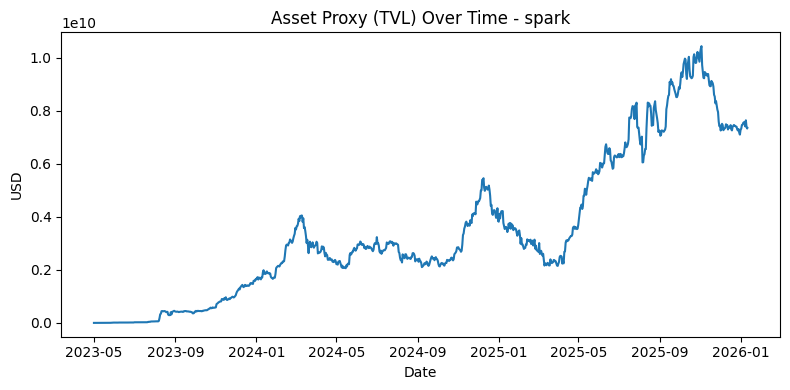

In [26]:
import matplotlib.pyplot as plt

# Plot the asset proxy over time (TVL as proxy)
plt.figure(figsize=(8,4))
plt.plot(tvl["date"], tvl["assets_proxy_usd"])
plt.title(f"Asset Proxy (TVL) Over Time - {slug}")
plt.xlabel("Date")
plt.ylabel("USD")
plt.tight_layout()
plt.show()

status: 200
content-type: application/json
preview: [{"id":"2269","name":"Binance CEX","address":null,"symbol":"-","url":"https://www.binance.com","description":"Binance is
status: 200
content-type: application/json
preview: {"id":"parent#spark","name":"Spark","url":"https://app.spark.fi/points/KNQ5HD","referralUrl":"https://app.spark.fi/point


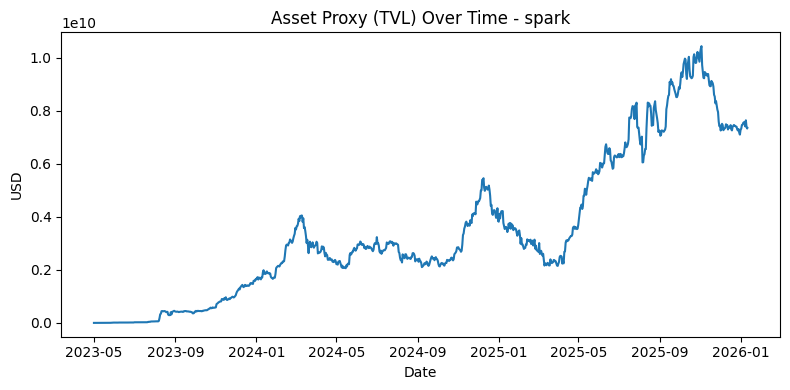

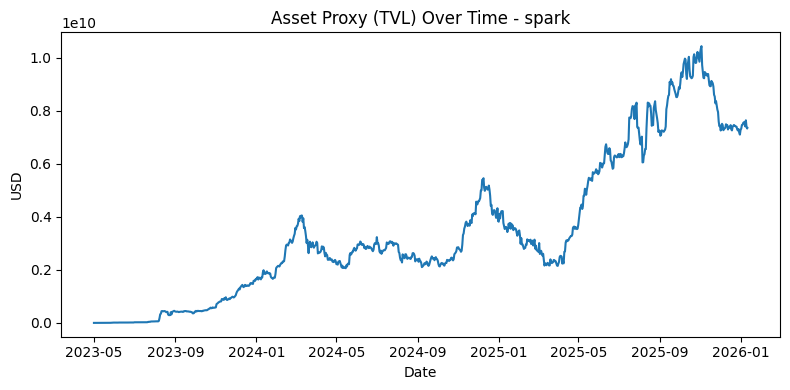

In [27]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import os

def fetch_json(url: str):
    """
    Fetch JSON from a URL with basic debug prints.
    Helps diagnose issues when an endpoint returns HTML or errors.
    """
    r = requests.get(url, timeout=30, headers={"User-Agent": "Mozilla/5.0"})
    print("status:", r.status_code)
    print("content-type:", r.headers.get("content-type"))
    print("preview:", r.text[:120].replace("\n", " "))
    r.raise_for_status()
    return r.json()

# 1) Pull the full protocol list (avoid guessing slugs)
protocols = fetch_json("https://api.llama.fi/protocols")
df = pd.DataFrame(protocols)

# 2) Find related protocols (Spark / Sky / Maker keywords)
candidates = (
    df[df["name"].str.contains("spark|sky|maker", case=False, na=False)]
    [["name", "slug", "category", "tvl"]]
    .sort_values("tvl", ascending=False)
)
candidates.head(30)

# 3) Choose the slug you want to analyze
slug = "spark"  # main proxy suggestion

# 4) Pull protocol TVL history (used as an asset-side proxy)
data = fetch_json(f"https://api.llama.fi/protocol/{slug}")
tvl = pd.DataFrame(data["tvl"])
tvl["date"] = pd.to_datetime(tvl["date"], unit="s")
tvl = tvl.rename(columns={"totalLiquidityUSD": "assets_proxy_usd"})

# 5) Plot the asset proxy over time
plt.figure(figsize=(8,4))
plt.plot(tvl["date"], tvl["assets_proxy_usd"])
plt.title(f"Asset Proxy (TVL) Over Time - {slug}")
plt.xlabel("Date")
plt.ylabel("USD")
plt.tight_layout()
plt.show()

# 6) (Optional) Save the figure so GitHub repo can display it
os.makedirs("figures", exist_ok=True)
plt.figure(figsize=(8,4))
plt.plot(tvl["date"], tvl["assets_proxy_usd"])
plt.title(f"Asset Proxy (TVL) Over Time - {slug}")
plt.xlabel("Date")
plt.ylabel("USD")
plt.tight_layout()
plt.savefig(f"figures/{slug}_tvl_timeseries.png", dpi=200)
plt.show()

In [28]:
# Save asset proxy time series for downstream notebooks
import os

os.makedirs("../data", exist_ok=True)
tvl.to_csv("../data/spark_assets_proxy.csv", index=False)